# Avuzu CTR Models


In [153]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing

import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [154]:
'''Specifying the necessary imports'''
!pip install plotly
import pandas as pd
import numpy as np
import dask.dataframe as dask_data
#Dask data frames used to help in in-memory large computing on a single machine

#visualization specific imports 
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

import sklearn
import matplotlib.dates as mdates



In [155]:
matplotlib.style.use('ggplot')

#A parse date variable to pass in the read_csv function later to take into account the date format 
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

In [156]:
''' Specifying a sample of the original training data 
    Training data size == 5.87 gigabytes 
    Number of records === 40428966 (excess of 40 million records)
    
    Using random sampling to select a sample of 1 million records 
'''

import random
n = 40428966  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

#Tracking the indices of rows to be skipped at random in the next stage i.e the LOADING stage 


In [157]:
''' LOADING stage 
    Reading the sampled train data
    Size : 1 million records
'''

train_data = pd.read_csv('C:\\Users\\Joseph\\Downloads\\train.csv', parse_dates = ['hour'], date_parser = parse_date,
                        skiprows = skip_values )



In [158]:
'''
Memory optimization at this point ~~ 183 megabytes 

Optimization technique ::: Alter data types from int64 to int32 to reduce block memory usage

Then RELOADING the data 
'''
data_types = {
    'id': np.str,
    'click': np.bool_,
    'hour': np.str,
    'C1': np.uint16,
    'banner_pos': np.uint16,
    'site_id': np.object,
    'site_domain': np.object,
    'site_category': np.object,
    'app_id': np.object,
    'app_domain': np.object,
    'app_category': np.object,
    'device_id': np.object,
    'device_ip': np.object,
    'device_model': np.object,
    'device_type': np.uint16,
    'device_conn_type': np.uint16,
    'C14': np.uint16,
    'C15': np.uint16,
    'C16': np.uint16,
    'C17': np.uint16,
    'C18': np.uint16,
    'C19': np.uint16,
    'C20': np.uint16,
    'C21': np.uint16
}

train_data = pd.read_csv('C:\\Users\\Joseph\\Downloads\\train.csv', parse_dates = ['hour'],
                        date_parser = parse_date, skiprows = skip_values , 
                        dtype = data_types )




In [159]:
train_data_clicks = train_data[train_data['click']==1]

In [160]:
train_data.info() 


## Memory consumption reduced to 107.8 + MB

'''
% reduction in memory usage = 40% 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 24 columns):
id                  1000001 non-null object
click               1000001 non-null bool
hour                1000001 non-null datetime64[ns]
C1                  1000001 non-null uint16
banner_pos          1000001 non-null uint16
site_id             1000001 non-null object
site_domain         1000001 non-null object
site_category       1000001 non-null object
app_id              1000001 non-null object
app_domain          1000001 non-null object
app_category        1000001 non-null object
device_id           1000001 non-null object
device_ip           1000001 non-null object
device_model        1000001 non-null object
device_type         1000001 non-null uint16
device_conn_type    1000001 non-null uint16
C14                 1000001 non-null uint16
C15                 1000001 non-null uint16
C16                 1000001 non-null uint16
C17                 1000001 non-null uint16
C

'\n% reduction in memory usage = 40% \n'

In [161]:
train_data.describe() 

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06
mean,1.004967e+03,2.879657e-01,1.014627e+00,3.308557e-01,1.885019e+04,3.188806e+02,6.015618e+01,2.113651e+03,1.433991e+00,2.273713e+02,4.908665e+04,8.340139e+01
std,1.093479e+00,5.061064e-01,5.254246e-01,8.547599e-01,4.947091e+03,2.139138e+01,4.739065e+01,6.080134e+02,1.326595e+00,3.511626e+02,1.544899e+04,7.030051e+01
min,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,3.446400e+04,1.000000e+00
25%,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,3.454800e+04,2.300000e+01
50%,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,3.465700e+04,6.100000e+01
75%,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,6.553500e+04,1.010000e+02
max,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,6.553500e+04,2.550000e+02


In [162]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10006777279679619273,False,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,d2bb6502,2347f47a,...,1,3,18987,320,50,2158,3,291,34657,61
1,10010452321736390000,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,34548,79
2,10012222478217629851,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,34548,79
3,10017994765842027302,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,65535,79
4,1001833017047577515,False,2014-10-21,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,65535,79


In [163]:

'''
24 features encompassing site attributes, application features, device attributes 

Target features - click 
>>C14 - C21 - Anonymized categorical variables 

Features kept anonymous via. md5 hashing encrypton : 
  
>>Site features - Site_id, Site_domain, Site_category
>>App features - app_id, app_domain 
>>Device features - device_type, device_conn_type 

'''

train_data.iloc[:, :24].head(5)


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10006777279679619273,False,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,d2bb6502,2347f47a,...,1,3,18987,320,50,2158,3,291,34657,61
1,10010452321736390000,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,34548,79
2,10012222478217629851,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,34548,79
3,10017994765842027302,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,65535,79
4,1001833017047577515,False,2014-10-21,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,65535,79


'\n'

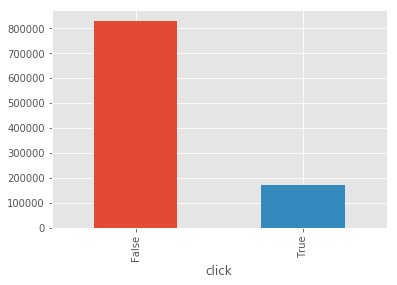

In [164]:
%matplotlib inline

train_data.groupby('click').size().plot(kind = 'bar')
rows = train_data.shape[0]

click_through_rate = train_data['click'].value_counts()/rows 

click_through_rate

'''
'''

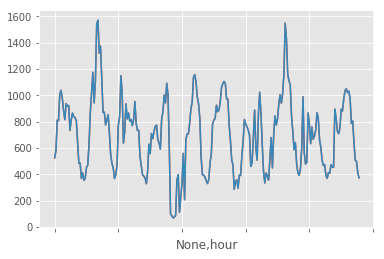

In [165]:
'''
Metric 1. HOUR 
'''

train_data.hour.describe() 


'''INSIGHT 2: Impressions V/S Clicks 
    MAXIMUM number of Impresisons around 1 P.M ~ 1561 '''

df_impressions = train_data.groupby('hour').agg({'click':'sum'})
#df_impressions
df_impressions.unstack().plot()

df_click = train_data[train_data['click']==1]
temp_click = df_click.groupby('hour').agg({'click' : 'sum'})
temp_click.unstack().plot()

#temp_click

In [166]:
train_data.hour.describe()

count                 1000001
unique                    240
top       2014-10-22 09:00:00
freq                    11024
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

In [167]:
''' HOUR as a metric is difficult to read because it is a time stamp 
    Introducing new metrics: 
     1. hour_in_day - Better KPI to assess the impressions v/s clicks behavior w.r.t hour in day
     2. weekday -- To study user behavior w.r.t clicks on each day 
     3. Day_name -- To extract the day name from the HOUR feature for a better understanding 
'''

train_data['hour_in_day'] = train_data['hour'].apply(lambda val : val.hour)
train_data_clicks['hour_in_day'] = train_data_clicks['hour'].apply(lambda val : val.hour)

train_data['weekday'] = train_data['hour'].apply(lambda val: val.dayofweek)
train_data_clicks['weekday'] = train_data_clicks['hour'].apply(lambda val: val.dayofweek)

train_data['day_name'] = train_data['hour'].apply(lambda x: x.strftime('%A'))
train_data_clicks['day_name'] = train_data_clicks['hour'].apply(lambda x: x.strftime('%A'))



D:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [168]:
train_data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_in_day',
       'weekday', 'day_name'],
      dtype='object')

In [169]:
train_data['hour_in_day'].nunique() #~ 0 TO 23 

24

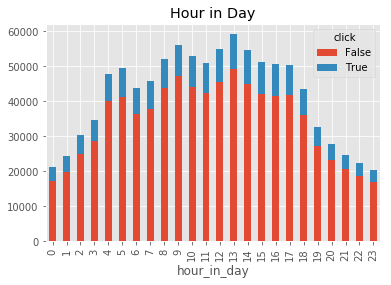

In [170]:
train_data.groupby(['hour_in_day', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Hour in Day")

In [171]:
train_data[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-22 10:00:00,1571.0
2014-10-28 13:00:00,1549.0
2014-10-22 09:00:00,1541.0
2014-10-28 14:00:00,1430.0
2014-10-22 12:00:00,1374.0
2014-10-22 11:00:00,1321.0
2014-10-22 06:00:00,1175.0
2014-10-28 15:00:00,1161.0
2014-10-28 12:00:00,1160.0


In [172]:
train_data_clicks[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False) #do the other way TRUE

,click
hour,
2014-10-22 10:00:00,1571.0
2014-10-28 13:00:00,1549.0
2014-10-22 09:00:00,1541.0
2014-10-28 14:00:00,1430.0
2014-10-22 12:00:00,1374.0
2014-10-22 11:00:00,1321.0
2014-10-22 06:00:00,1175.0
2014-10-28 15:00:00,1161.0
2014-10-28 12:00:00,1160.0


In [173]:
train_data_clicks.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
1,10010452321736390000,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,34548,79,0,1,Tuesday
6,1002474033882047925,True,2014-10-21,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,320,50,1993,2,1063,34548,33,0,1,Tuesday
7,10031141284541863694,True,2014-10-21,1005,0,d8bb8687,98e6755b,3e814130,ecad2386,7801e8d9,...,320,50,1973,3,39,34652,23,0,1,Tuesday
8,10047611483795584882,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,65535,79,0,1,Tuesday
9,10057518165096697011,True,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,320,50,1899,0,431,65535,117,0,1,Tuesday


In [174]:
hour_df = pd.DataFrame() 

In [175]:
hour_df['hr'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['hour_in_day']
                        
hour_df
#hour_df.drop("hr", axis = 1, inplace = True)

train_data_clicks.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
1,10010452321736390000,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,34548,79,0,1,Tuesday
6,1002474033882047925,True,2014-10-21,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,320,50,1993,2,1063,34548,33,0,1,Tuesday
7,10031141284541863694,True,2014-10-21,1005,0,d8bb8687,98e6755b,3e814130,ecad2386,7801e8d9,...,320,50,1973,3,39,34652,23,0,1,Tuesday
8,10047611483795584882,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,65535,79,0,1,Tuesday
9,10057518165096697011,True,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,320,50,1899,0,431,65535,117,0,1,Tuesday


In [176]:
'''
Taking into account just the CLICKS 
'''
hour_df['pos_clicks'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']
            
hour_df

,hr,pos_clicks
13,13,10052
14,14,9724
12,12,9348
15,15,9213
16,16,9059
9,9,8798
10,10,8778
11,11,8738
17,17,8567
8,8,8429


In [177]:
'''
Taking into account the IMPRESSIONS
'''
hour_df['impressions_total'] = train_data[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']
            
hour_df


,hr,pos_clicks,impressions_total
13,13,10052,59131
14,14,9724,54644
12,12,9348,54889
15,15,9213,51235
16,16,9059,50575
9,9,8798,55923
10,10,8778,52900
11,11,8738,50915
17,17,8567,50323
8,8,8429,52117


In [178]:
'''
Introducing a new feature click through rate 
'''

hour_df['click_through_rate'] = 100*hour_df['pos_clicks']/hour_df['impressions_total']

#hour_df.sort_values(ascending = False, by = 'impressions_total')
hour_df.sort_values(ascending = False, by = 'click_through_rate')


,hr,pos_clicks,impressions_total,click_through_rate
1,1,4514,24332,18.551701
15,15,9213,51235,17.981848
0,0,3771,21005,17.952868
16,16,9059,50575,17.912012
2,2,5417,30261,17.900929
14,14,9724,54644,17.795183
7,7,8063,45677,17.652210
3,3,6055,34619,17.490395
23,23,3486,20246,17.218216
11,11,8738,50915,17.161937


In [179]:
list_of_hours = hour_df.sort_values(by='click_through_rate',ascending=False)['hr'].tolist()

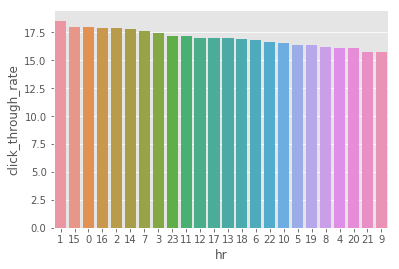

In [180]:
import seaborn as sns
sns.barplot(y='click_through_rate',x='hr'\
            ,data=hour_df\
            ,order=list_of_hours) #nice axis...

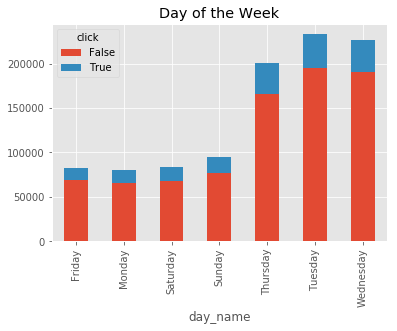

In [181]:
train_data.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

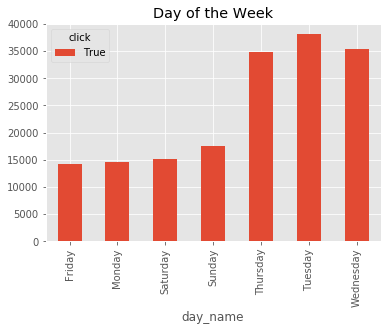

In [182]:
train_data_clicks.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

In [183]:
train_data_clicks[['day_name','click']].groupby(['day_name']).count().sort_values('click',ascending=False)

,click
day_name,
Tuesday,38099
Wednesday,35431
Thursday,34835
Sunday,17500
Saturday,15108
Monday,14631
Friday,14251


In [184]:
day_df = pd.DataFrame()

In [185]:
day_df['day'] = train_data_clicks[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['day_name']
day_df 

,day
5,Tuesday
6,Wednesday
4,Thursday
3,Sunday
2,Saturday
1,Monday
0,Friday


In [186]:
day_df['pos_clicks'] = train_data_clicks[['day_name','click']]\
                        .groupby(['day_name']).count()\
                        .reset_index()\
                        .sort_values('click',ascending=False)['click']
day_df

,day,pos_clicks
5,Tuesday,38099
6,Wednesday,35431
4,Thursday,34835
3,Sunday,17500
2,Saturday,15108
1,Monday,14631
0,Friday,14251


In [187]:
day_df['total_impressions'] = train_data[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['click']
day_df

,day,pos_clicks,total_impressions
5,Tuesday,38099,232990
6,Wednesday,35431,226086
4,Thursday,34835,200263
3,Sunday,17500,94657
2,Saturday,15108,83396
1,Monday,14631,79840
0,Friday,14251,82769


In [188]:
day_df['click_pct'] = 100*day_df['pos_clicks']/day_df['total_impressions']
day_df.sort_values(ascending = False, by = 'click_pct')

,day,pos_clicks,total_impressions,click_pct
3,Sunday,17500,94657,18.487803
1,Monday,14631,79840,18.325401
2,Saturday,15108,83396,18.115977
4,Thursday,34835,200263,17.394626
0,Friday,14251,82769,17.217799
5,Tuesday,38099,232990,16.352204
6,Wednesday,35431,226086,15.671470


In [189]:
list_of_days = day_df.sort_values(by='click_pct',ascending=False)['day'].tolist()

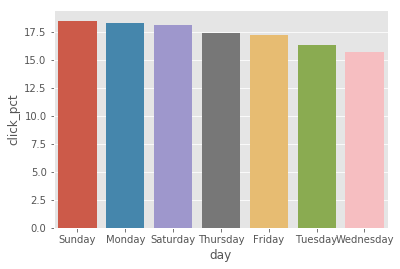

In [190]:
sns.barplot(y='click_pct',x='day'\
            ,data=day_df\
            ,order=list_of_days)

In [191]:
train_data['banner_pos'].unique()

array([0, 1, 2, 5, 7, 4, 3], dtype=uint64)

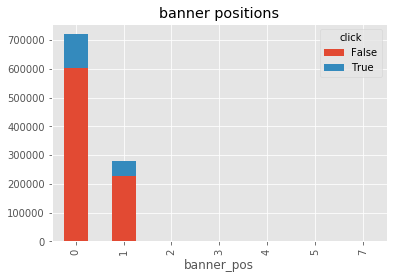

In [192]:
banner_temp =train_data[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [193]:
train_data[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,719996
1,278258
7,1078
2,302
4,179
5,139
3,49


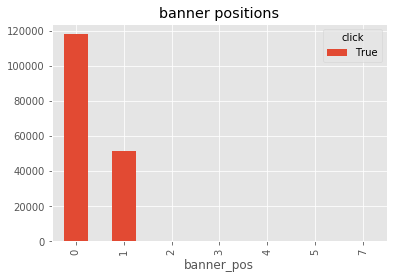

In [194]:
banner_temp =train_data_clicks[['banner_pos','click']].groupby(['banner_pos','click'])

banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [195]:
train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,117869
1,51543
7,347
2,40
4,29
5,19
3,8


In [196]:
import pandas as pd 

banner_df = pd.DataFrame()

In [197]:
banner_df['position'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['banner_pos']

In [198]:
banner_df['pos_clicks'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [199]:
banner_df['total_impressions'] = train_data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [200]:
banner_df['click_pct'] = 100*banner_df['pos_clicks']/banner_df['total_impressions']

banner_df

,position,pos_clicks,total_impressions,click_pct
0,0,117869,719996,16.370785
1,1,51543,278258,18.523457
6,7,347,1078,32.189239
2,2,40,302,13.245033
4,4,29,179,16.201117
5,5,19,139,13.669065
3,3,8,49,16.326531


In [201]:
banner_df.sort_values(ascending=False,by='click_pct')

,position,pos_clicks,total_impressions,click_pct
6,7,347,1078,32.189239
1,1,51543,278258,18.523457
0,0,117869,719996,16.370785
3,3,8,49,16.326531
4,4,29,179,16.201117
5,5,19,139,13.669065
2,2,40,302,13.245033


In [202]:
list_of_banners = banner_df.sort_values(by='click_pct',ascending=False)['position'].tolist()

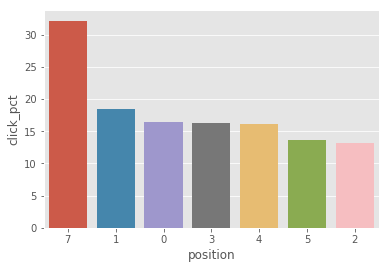

In [203]:
sns.barplot(y='click_pct',x='position'\
            ,data=banner_df\
            ,order=list_of_banners)

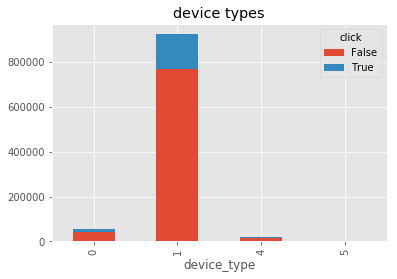

In [204]:
device_temp = train_data[['device_type','click']].groupby(['device_type','click'])

device_temp.size().unstack().plot(kind='bar',stacked=True, title='device types')


In [205]:
train_data[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,922929
0,54938
4,18971
5,3163


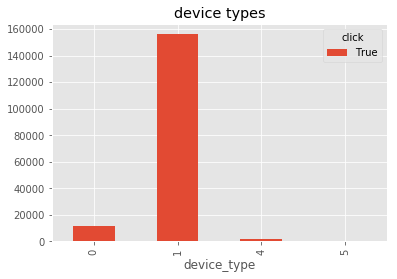

In [206]:
train_data_clicks[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',stacked=True, title='device types')

In [207]:
train_data_clicks[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,156099
0,11571
4,1890
5,295


In [208]:
device1_df = train_data_clicks[train_data_clicks['device_type']==1]

# extract CLICKS for DEVICE TYPE 1 

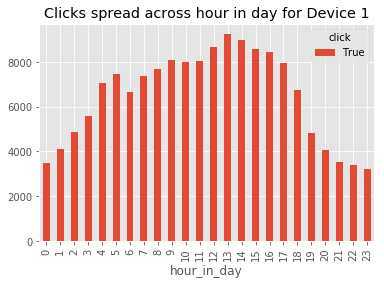

In [209]:
temp_device_df = device1_df.groupby(['hour_in_day', 'click'])

temp_device_df.size().unstack().plot(kind='bar', stacked=True, title="Clicks spread across hour in day for Device 1")

In [210]:
import pandas as pd
dev_type_df=pd.DataFrame()

dev_type_df_total_imp = pd.DataFrame()

In [211]:
#TOTAL CLICKS 

dev_type_df = train_data_clicks.groupby('device_type').agg({'click':'sum'}).reset_index()

dev_type_df

,device_type,click
0,0,11571.0
1,1,156099.0
2,4,1890.0
3,5,295.0


In [212]:
#TOTAL IMPRESSIONS 

dev_type_df_total_imp = train_data.groupby('device_type').agg({'click':'count'}).reset_index()

In [213]:
#dev_type_df_total_imp.drop([2], inplace = True)

dev_type_df_total_imp

,device_type,click
0,0,54938
1,1,922929
2,4,18971
3,5,3163


In [214]:
dev_type_df['total_impressions'] = dev_type_df_total_imp['click']

dev_type_df

,device_type,click,total_impressions
0,0,11571.0,54938
1,1,156099.0,922929
2,4,1890.0,18971
3,5,295.0,3163


In [215]:
## sucess percentage == CTR 

dev_type_df['success_pct'] = (dev_type_df['click']/dev_type_df['total_impressions'])*100

dev_type_df

,device_type,click,total_impressions,success_pct
0,0,11571.0,54938,21.061924
1,1,156099.0,922929,16.913435
2,4,1890.0,18971,9.962574
3,5,295.0,3163,9.326589


In [216]:
dev_type_df_total_imp.columns = ['device_type', 'click2']

merged_df = pd.merge(left = dev_type_df , right = dev_type_df_total_imp,
                    how = 'inner', on = 'device_type')


In [217]:
merged_df

,device_type,click,total_impressions,success_pct,click2
0,0,11571.0,54938,21.061924,54938
1,1,156099.0,922929,16.913435,922929
2,4,1890.0,18971,9.962574,18971
3,5,295.0,3163,9.326589,3163


In [218]:
merged_df['success_pct'] = 100*(merged_df['click']/merged_df['total_impressions'])

merged_df

,device_type,click,total_impressions,success_pct,click2
0,0,11571.0,54938,21.061924,54938
1,1,156099.0,922929,16.913435,922929
2,4,1890.0,18971,9.962574,18971
3,5,295.0,3163,9.326589,3163


In [219]:
app_features = ['app_id', 'app_domain', 'app_category']

In [220]:
train_data.groupby('app_category').agg({'click':'sum'}).sort_values(by='click',ascending = False)


,click
app_category,
07d7df22,129378.0
0f2161f8,25226.0
f95efa07,7041.0
cef3e649,3860.0
8ded1f7a,3266.0
d1327cf5,366.0
dc97ec06,219.0
09481d60,201.0
75d80bbe,83.0


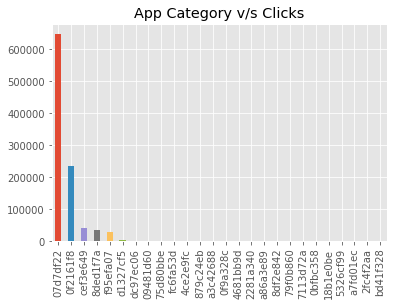

In [221]:
train_data['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')


In [222]:
train_app_category = train_data.groupby(['app_category', 'click']).size().unstack()


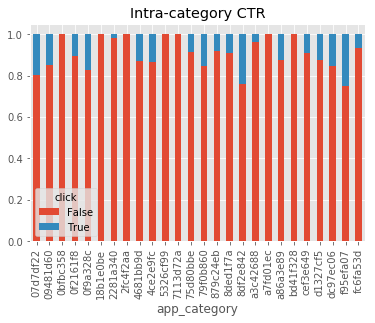

In [223]:

train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR")

In [224]:

features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18',
            'C20', 'C21']

train_data[features].astype('object').describe()



,C1,C14,C15,C16,C17,C18,C20,C21
count,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001
unique,7,2243,8,9,420,4,162,60
top,1005,4687,320,50,1722,0,65535,23
freq,918774,23218,932153,942952,111581,418633,468699,220276


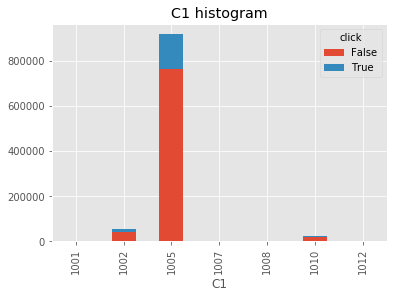

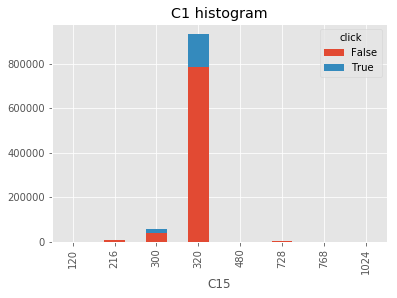

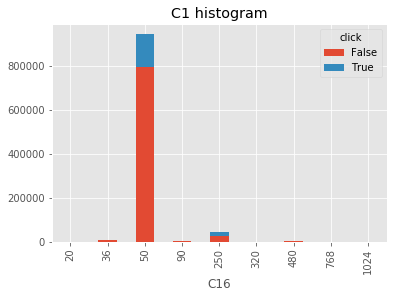

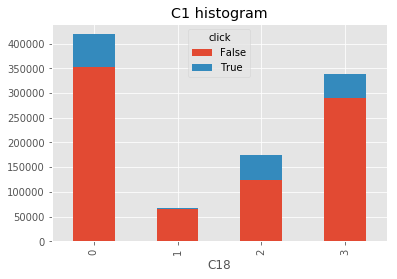

In [225]:
train_data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')
train_data.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')


In [226]:
model_features = ['weekday', 'hour_in_day',
                  'banner_pos', 'site_category',
                  'device_conn_type', 'app_category',
                  'device_type']

In [227]:
model_target = 'click'

In [228]:
train_model = train_data[model_features+[model_target]].sample(frac=0.1,random_state=42)

In [229]:
def one_hot_features(data_frame, feature_set):
    new_data_frame = pd.get_dummies(data_frame,
                                     columns = feature_set,
                                    sparse = True)

    return new_data_frame

In [230]:
train_model = one_hot_features(train_model,
                                ['site_category',
                                 'app_category',
                                 'banner_pos'])


In [231]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
0,10006777279679619273,False,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,d2bb6502,2347f47a,...,320,50,2158,3,291,34657,61,0,1,Tuesday
1,10010452321736390000,True,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,34548,79,0,1,Tuesday
2,10012222478217629851,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,34548,79,0,1,Tuesday
3,10017994765842027302,False,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,65535,79,0,1,Tuesday
4,1001833017047577515,False,2014-10-21,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,65535,79,0,1,Tuesday


In [232]:
df = train_data

In [233]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

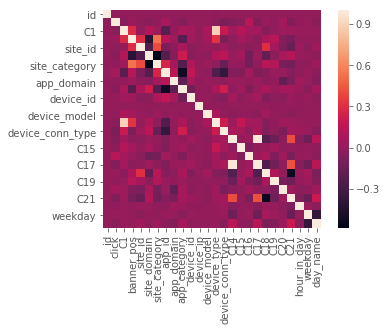

In [234]:
# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [265]:
encoded_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
0,421,False,1,1005,0,1391,2233,5,2519,25,...,320,50,2158,3,291,34657,61,0,1,5
1,631,True,1,1005,0,334,2728,1,2849,85,...,320,50,1722,0,35,34548,79,0,1,5
2,734,False,1,1005,0,334,2728,1,2849,85,...,320,50,1722,0,35,34548,79,0,1,5
3,1086,False,1,1005,0,334,2728,1,2849,85,...,320,50,1722,0,35,65535,79,0,1,5
4,1108,False,1,1005,1,733,478,1,2849,85,...,320,50,1722,0,35,65535,79,0,1,5


In [264]:
encoded_data['hour']=pd.get_dummies(encoded_data['hour'])

In [266]:
ld = encoded_data

In [267]:
ld.describe()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
count,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,...,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06,1.000001e+06
mean,5.000000e+05,3.039997e-03,1.004967e+03,2.879657e-01,1.276446e+03,1.932430e+03,8.647296e+00,2.473231e+03,8.144255e+01,2.967977e+00,...,3.188806e+02,6.015618e+01,2.113651e+03,1.433991e+00,2.273713e+02,4.908665e+04,8.340139e+01,1.127018e+01,2.601946e+00,3.853117e+00
std,2.886756e+05,5.505232e-02,1.093479e+00,5.061064e-01,6.496351e+02,6.752257e+02,7.295498e+00,7.233571e+02,3.126853e+01,6.281661e+00,...,2.139138e+01,4.739065e+01,6.080134e+02,1.326595e+00,3.511626e+02,1.544899e+04,7.030051e+01,5.954872e+00,1.728128e+00,1.893902e+00
min,0.000000e+00,0.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,3.446400e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+05,0.000000e+00,1.005000e+03,0.000000e+00,9.630000e+02,1.454000e+03,3.000000e+00,2.532000e+03,8.500000e+01,0.000000e+00,...,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,3.454800e+04,2.300000e+01,6.000000e+00,1.000000e+00,3.000000e+00
50%,5.000000e+05,0.000000e+00,1.005000e+03,0.000000e+00,1.391000e+03,2.233000e+03,5.000000e+00,2.849000e+03,8.500000e+01,0.000000e+00,...,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,3.465700e+04,6.100000e+01,1.100000e+01,2.000000e+00,4.000000e+00
75%,7.500000e+05,0.000000e+00,1.005000e+03,1.000000e+00,1.391000e+03,2.233000e+03,1.900000e+01,2.849000e+03,8.500000e+01,3.000000e+00,...,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,6.553500e+04,1.010000e+02,1.600000e+01,4.000000e+00,5.000000e+00
max,1.000000e+06,1.000000e+00,1.012000e+03,7.000000e+00,2.661000e+03,2.862000e+03,2.000000e+01,3.083000e+03,1.990000e+02,2.500000e+01,...,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,6.553500e+04,2.550000e+02,2.300000e+01,6.000000e+00,6.000000e+00


In [268]:
target = ld.click

inputs = ld.drop('click', axis=1)

In [269]:
target.head(1)

0    False
Name: click, dtype: bool

In [270]:
inputs.head(1)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
0,421,1,1005,0,1391,2233,5,2519,25,15,...,320,50,2158,3,291,34657,61,0,1,5


In [271]:
from sklearn.model_selection import train_test_split
results = train_test_split(
        inputs,
        target, 
        test_size = 0.2,
        random_state = 42
)

In [272]:
print(type(results))
print(len(results))
print('---')
for item in results:
    print(item.shape)

<class 'list'>
4
---
(800000, 26)
(200001, 26)
(800000,)
(200001,)


In [273]:
# Split your data and pass the results to a new object named "results"

input_train, input_test, target_train, target_test = results
print(input_train.shape)
print(input_test.shape)
print(target_train.shape)
print(target_test.shape)

(800000, 26)
(200001, 26)
(800000,)
(200001,)


In [274]:
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=1))    
}

In [275]:
from sklearn.linear_model import ElasticNet

pipelines['enet'] = make_pipeline(
    StandardScaler(),
    ElasticNet(random_state=1)
)

In [276]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pipelines['rf'] = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=1)
)

pipelines['gb'] = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(random_state=1)
)

In [277]:
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [278]:
input_train.head(1)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
382311,102778,0,1005,0,1921,2311,19,2849,85,0,...,320,50,2572,3,297,34619,42,14,4,0


In [279]:
input_test.head(1)

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
624589,852569,0,1010,1,1391,2233,5,1983,85,3,...,320,50,1722,0,35,34547,79,10,0,1


In [280]:
target_train.head(1)

382311    False
Name: click, dtype: bool

In [281]:
target_test.head(1)

624589    False
Name: click, dtype: bool

### 5. Hyperparameter Tuning

**Lesson Workspace**

In [282]:
# Create a hyperparameter grid for Lasso

lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
    
}

In [283]:
# Create a hyperparameter grid for Ridge

ridge_hyperparameters = { 
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5] 
}
# Create a hyperparameter grid for Elastic Net

enet_hyperparameters = { 
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'elasticnet__l1_ratio' : [0.01, 0.3, 0.5, 0.7, .9]
}


In [284]:
# Create a hyperparameter grid for Random Forest



rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200] ,
    'randomforestregressor__max_features' : ['auto', 0.3, 0.6]
}

# Create a hyperparameter grid for Gradient Booster

gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators' : [100, 200] ,
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5] 
}

**Lesson Workspace**

In [285]:
# Create the hyperparameter_grids dictionary

hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [286]:
# Run the code below to make sure everything is set up correctly
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

enet was found, and it is a grid.
gb was found, and it is a grid.
ridge was found, and it is a grid.
rf was found, and it is a grid.
lasso was found, and it is a grid.


### 6. Cross Validation

**Lesson Workspace**

In [287]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [288]:
untrained_lasso_model = GridSearchCV(
    pipelines['lasso'],
    hyperparameter_grids['lasso'],
    cv=5
)

In [289]:
print(pipelines.keys())
print('---')
print(hyperparameter_grids.keys())

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])
---
dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])


In [290]:
models = {}

for key in pipelines.keys():
    models[key] = GridSearchCV(
        pipelines[key],
        hyperparameter_grids[key],
        cv=5
    )

models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [291]:
models['lasso'].fit(input_train, target_train)

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lasso__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [292]:
models['ridge'].fit(input_train, target_train)

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ridge__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [293]:
%time
models['gb'].fit(input_train, target_train)

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\sit

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\sit

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...e=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gradientboostingregressor__n_estimators': [100, 200], 'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2], 'gradientboostingregressor__max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
for key in models.keys():
    models[key].fit(input_train, target_train)
    print(key, 'is trained and tuned.')

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

lasso is trained and tuned.


D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

ridge is trained and tuned.


D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\sit

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\sit

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\sit

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Ana

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib

enet is trained and tuned.


D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.

D:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

Data with input dtype uint8, uint16, int32, int64 were all converted to float64 by StandardScaler.



### 7. Selecting a Winning Model

**Lesson Workspace**

In [ ]:
# Import the r-squared and mean absolute error metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
y_pred = .predict(input_test)


In [ ]:
lasso_preds = models['lasso'].predict(input_test)

In [ ]:
print('R-Sqaured:', round(r2_score(target_test, lasso_preds),3))
print('MAE:', round(mean_absolute_error(target_test, lasso_preds), 3))
print('MSE:', round(mean_squared_error(target_test, lasso_preds), 3))
print('RMSE:', round(np.sqrt(mean_squared_error(target_test, lasso_preds))))



In [ ]:
for key in models:
    preds = models[key].predict(input_test)
    print(key)
    print('R-Sqaured:', round(r2_score(target_test, preds),3))
    print('MAE:', round(mean_absolute_error(target_test, preds), 3))
    print('MSE:', round(mean_squared_error(target_test, preds), 3))
    print('RMSE:', round(np.sqrt(mean_squared_error(target_test, preds))))
    print('---')

In [ ]:
# Make prediction with test data
preds = models['gb'].predict(input_test)

# Plot predictions on x axis and actuals on y axis
plt.scatter(preds, target_test)

# Label axes and show graph
plt.xlabel('predicted')
plt.ylabel('actual')
plt.plot()

